In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
import pandas as pd
from helpers import style

from networkx.algorithms.community import greedy_modularity_communities, modularity

style.load_style(font='Roboto')

In [2]:
dists = pd.read_csv('/home/rb/Documents/Data/models/lda/full-postwar/dists-speech-bound-250',sep='\t')
data = pd.read_csv('/home/rb/Documents/Data/models/lda/full-postwar/data-speech-level-full.tsv',sep='\t')   

In [18]:
def visualize_network(ax, df, color_palette, write_btw=False):
    G = nx.Graph()
    G.add_edges_from([(row['source'], row['target']) for _, row in df.iterrows()])
    node_colors = sns.color_palette(color_palette, n_colors=len(G.nodes))
    pos = nx.spring_layout(G, k=.05)
    nx.draw_networkx_edges(G,pos,width=1,ax=ax)

    betweenness = nx.betweenness_centrality(G)

    # Find the node with the highest betweenness
    highest_betweenness_node = max(betweenness, key=betweenness.get)
    print(highest_betweenness_node)

    for c,(node, p) in enumerate(pos.items()):
        if write_btw and node == highest_betweenness_node:
            ax.annotate(text=int(node) if node != highest_betweenness_node else 'HB',
                        xy=p,
                        color='white',
                        bbox=dict(facecolor=node_colors[c] if node != highest_betweenness_node else "black",
                        boxstyle='circle'),
                        fontsize=12 if node != highest_betweenness_node else 20,
                        ha='center',
                        va='center')
            highest_betweenness_value = betweenness[highest_betweenness_node]
            x,y = p
            x,y = x, y + abs((y * .9))
            # ax.annotate(f"Betweenness: {highest_betweenness_value:.2f}", xy=(x,y), ha='center')

        else:
            ax.annotate(text=int(node),
                        xy=p,
                        color='white',
                        bbox=dict(facecolor=node_colors[c],
                        boxstyle='circle'),
                        fontsize=12,
                        ha='center',
                        va='center')
    degree = nx.degree(G)
    degree = round(sum(dict(degree).values()) / len(G), 2)
    ax.axis('off')
    return ax, degree, G

In [6]:
df1 = pd.DataFrame({'source': [1, 2, 6, 4, 5, 6, 1, 2], 'target': [2, 3, 4, 5, 6, 3, 3, 4]})
df2 = pd.DataFrame({'source': [1, 2, 7, 4, 5, 6], 'target': [7, 8, 9, 10, 11, 12]})

2
7


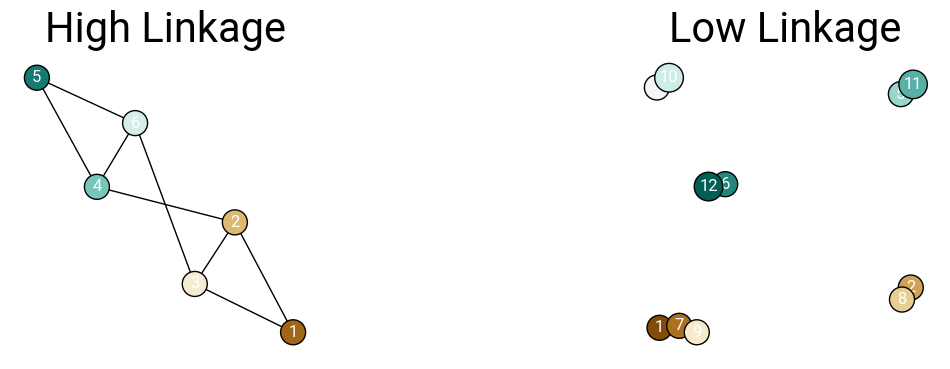

In [7]:
fig, ax = plt.subplots(1,2,figsize=(12,4))

a1, d1, g1 = visualize_network(ax[0],df1,'BrBG')
a1.set_title('High Linkage',fontsize=30)

a2, d2, g2 = visualize_network(ax[1],df2,'BrBG')
a2.set_title('Low Linkage',fontsize=30)

plt.savefig('figs/degree-samples-pres.png',dpi=300,bbox_inches='tight')
plt.subplots_adjust(wspace=1)
plt.show()

In [15]:
# High Modularity DataFrame
df_high_modularity = pd.DataFrame({
    'source': [0, 1, 1, 2, 2, 2, 6, 7, 7, 13, 14, 13, 15, 16,22,45],
    'target': [2, 2, 3, 3, 1, 3, 8, 8, 6, 14, 15, 15, 12, 14,77,8]
})

# Low Modularity DataFrame
df_low_modularity = pd.DataFrame({
    'source': [1, 2, 3, 4, 5, 1, 10, 3, 1, 2, 8, 9],
    'target': [6, 7, 8, 9, 10, 2, 4, 6, 10, 4, 5, 7]
})

14
1


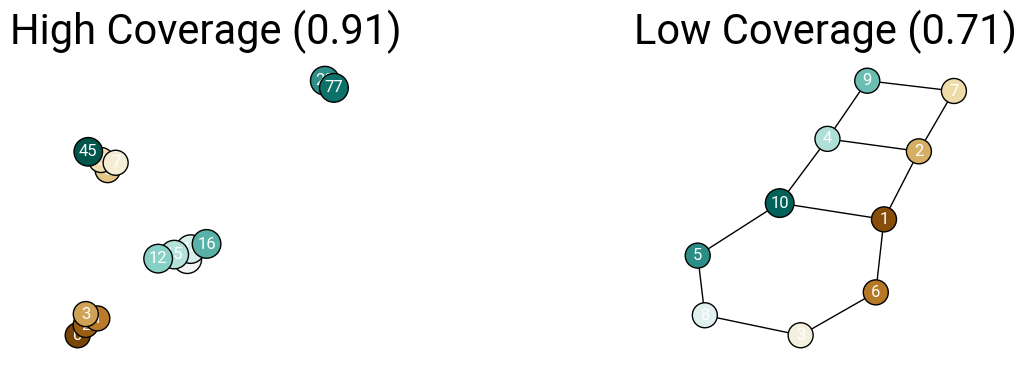

In [19]:
fig, ax = plt.subplots(1,2,figsize=(12,4))

a1, d1, g1 = visualize_network(ax[0],df_high_modularity,'BrBG',write_btw=False)
communities1 = list(greedy_modularity_communities(g1))
pq1 = quality.partition_quality(G=g1,partition=communities1)

a1.set_title(f'High Coverage ({round(pq1[1], 2)})',fontsize=30)

a2, d2, g2 = visualize_network(ax[1],df_low_modularity,'BrBG',write_btw=False)
communities2 = list(greedy_modularity_communities(g2))
pq2 = quality.partition_quality(G=g2,partition=communities2)

a2.set_title(f'Low Coverage ({round(pq2[1], 2)})',fontsize=30)

plt.savefig('figs/coverage-samples-pres.png',dpi=300,bbox_inches='tight')
plt.subplots_adjust(wspace=1)
plt.show()

In [10]:
from networkx.algorithms.community import quality

14
1


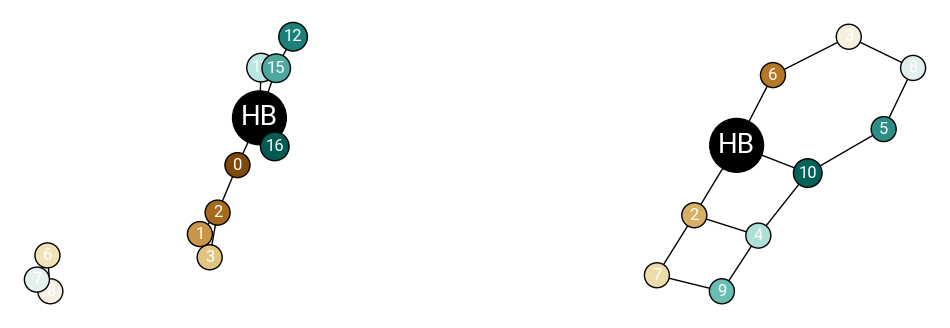

In [21]:
# High Modularity DataFrame
df_high_modularity = pd.DataFrame({
    'source': [0, 1, 1, 2, 2, 2, 6, 7, 7, 13, 14, 13, 15, 16, 14],
    'target': [2, 2, 3, 3, 1, 3, 8, 8, 6, 14, 15, 15, 12, 14, 0]
})

# Low Modularity DataFrame
df_low_modularity = pd.DataFrame({
    'source': [1, 2, 3, 4, 5, 1, 10, 3, 1, 2, 8, 9],
    'target': [6, 7, 8, 9, 10, 2, 4, 6, 10, 4, 5, 7]
})


fig, ax = plt.subplots(1,2,figsize=(12,4))

a1, d1, g1 = visualize_network(ax[0],df_high_modularity,'BrBG',write_btw=True)
communities = list(greedy_modularity_communities(g1))

a2, d2, g2 = visualize_network(ax[1],df_low_modularity,'BrBG',write_btw=True)
communities = list(greedy_modularity_communities(g2))

plt.savefig('figs/btw-samples-pres.png',dpi=300,bbox_inches='tight')
plt.subplots_adjust(wspace=1)
plt.show()

In [12]:
sel_ = data[data.speech_id.str.contains('196519660000822')]

In [24]:
dsel_ = dists.loc[sel_.index]
dst = pd.DataFrame([row.nlargest(3).values.tolist() for _, row in dsel_.iterrows()], columns=['t1', 't2', 't3'])
dst['member'] = sel_['member-ref'].reset_index(drop=True)
dst['tl'] = sel_.lemm_cleaned.str.split(' ').str.len().tolist()

In [42]:
dsel

,t1,t2,t3
0,0.232160,0.180436,0.155584
1,0.288903,0.286448,0.072178
2,0.234424,0.161852,0.156308
3,0.272969,0.112340,0.085947
4,0.224163,0.185210,0.184789
...,...,...,...
67,0.294835,0.182174,0.122117
68,0.167171,0.112983,0.059059
69,0.242722,0.184175,0.147264
70,0.326011,0.155855,0.096774


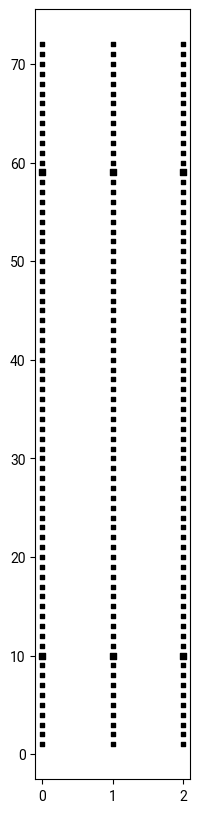

In [35]:
f,a = plt.subplots(figsize=(2,10))
cmap = {topic:sns.color_palette('ta')}

member_roll = None
for i,r in dst.iterrows():
    for xc,t in enumerate(['t1','t2','t3']):
        a.scatter([xc],[len(dst) - i],marker='s',s=np.log(r['tl']) * 2,facecolor='black',edgecolor='black')